# Tabular Playground Series - Clustering

<img src ="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSDaefRex2R9hWEAH0FaULfdCvI7TdRGdGxKw&s">


## Problemin Tanımı
Bu proje, **Tabular Playground Series - Jul 2022** yarışması kapsamında bir kümeleme (clustering) çalışmasıdır. Veri seti 29 adet sürekli değişken içermekte ve amaç bu verileri anlamlı gruplara (cluster) ayırmaktır.


# Veri Yükleme


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

DATA_DIR = '../data'
# Bu yarışmada genellikle tek bir 'data.csv' verilir ve bunu kümeleyip göndeririz.
# Ancak standart 'train.csv' veya 'data.csv' ismini kontrol edeceğiz.
TRAIN_PATH = os.path.join(DATA_DIR, 'data.csv') 
if not os.path.exists(TRAIN_PATH):
    TRAIN_PATH = os.path.join(DATA_DIR, 'train.csv')


In [4]:
try:
    df_data = pd.read_csv(TRAIN_PATH)
    print(f'Data Shape: {df_data.shape}')
except FileNotFoundError:
    print('HATA: Veri dosyası (data.csv veya train.csv) bulunamadı.')
    df_data = pd.DataFrame()


Data Shape: (98000, 30)


In [3]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98000 entries, 0 to 97999
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      98000 non-null  int64  
 1   f_00    98000 non-null  float64
 2   f_01    98000 non-null  float64
 3   f_02    98000 non-null  float64
 4   f_03    98000 non-null  float64
 5   f_04    98000 non-null  float64
 6   f_05    98000 non-null  float64
 7   f_06    98000 non-null  float64
 8   f_07    98000 non-null  int64  
 9   f_08    98000 non-null  int64  
 10  f_09    98000 non-null  int64  
 11  f_10    98000 non-null  int64  
 12  f_11    98000 non-null  int64  
 13  f_12    98000 non-null  int64  
 14  f_13    98000 non-null  int64  
 15  f_14    98000 non-null  float64
 16  f_15    98000 non-null  float64
 17  f_16    98000 non-null  float64
 18  f_17    98000 non-null  float64
 19  f_18    98000 non-null  float64
 20  f_19    98000 non-null  float64
 21  f_20    98000 non-null  float64
 22

# Veri İnceleme & EDA


,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
0,0,-0.389420,-0.912791,0.648951,0.589045,-0.830817,0.733624,2.258560,2,13,...,-0.478412,-0.757002,-0.763635,-1.090369,1.142641,-0.884274,1.137896,1.309073,1.463002,0.813527
1,1,-0.689249,-0.453954,0.654175,0.995248,-1.653020,0.863810,-0.090651,2,3,...,-0.428791,-0.089908,-1.784204,-0.839474,0.459685,1.759412,-0.275422,-0.852168,0.562457,-2.680541
2,2,0.809079,0.324568,-1.170602,-0.624491,0.105448,0.783948,1.988301,5,11,...,-0.413534,-1.602377,1.190984,3.267116,-0.088322,-2.168635,-0.974989,1.335763,-1.110655,-3.630723
3,3,-0.500923,0.229049,0.264109,0.231520,0.415012,-1.221269,0.138850,6,2,...,0.619283,1.287801,0.532837,1.036631,-2.041828,1.440490,-1.900191,-0.630771,-0.050641,0.238333
4,4,-0.671268,-1.039533,-0.270155,-1.830264,-0.290108,-1.852809,0.781898,8,7,...,-1.628830,-0.434948,0.322505,0.284326,-2.438365,1.473930,-1.044684,1.602686,-0.405263,-1.987263


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98000 entries, 0 to 97999
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      98000 non-null  int64  
 1   f_00    98000 non-null  float64
 2   f_01    98000 non-null  float64
 3   f_02    98000 non-null  float64
 4   f_03    98000 non-null  float64
 5   f_04    98000 non-null  float64
 6   f_05    98000 non-null  float64
 7   f_06    98000 non-null  float64
 8   f_07    98000 non-null  int64  
 9   f_08    98000 non-null  int64  
 10  f_09    98000 non-null  int64  
 11  f_10    98000 non-null  int64  
 12  f_11    98000 non-null  int64  
 13  f_12    98000 non-null  int64  
 14  f_13    98000 non-null  int64  
 15  f_14    98000 non-null  float64
 16  f_15    98000 non-null  float64
 17  f_16    98000 non-null  float64
 18  f_17    98000 non-null  float64
 19  f_18    98000 non-null  float64
 20  f_19    98000 non-null  float64
 21  f_20    98000 non-null  float64
 22

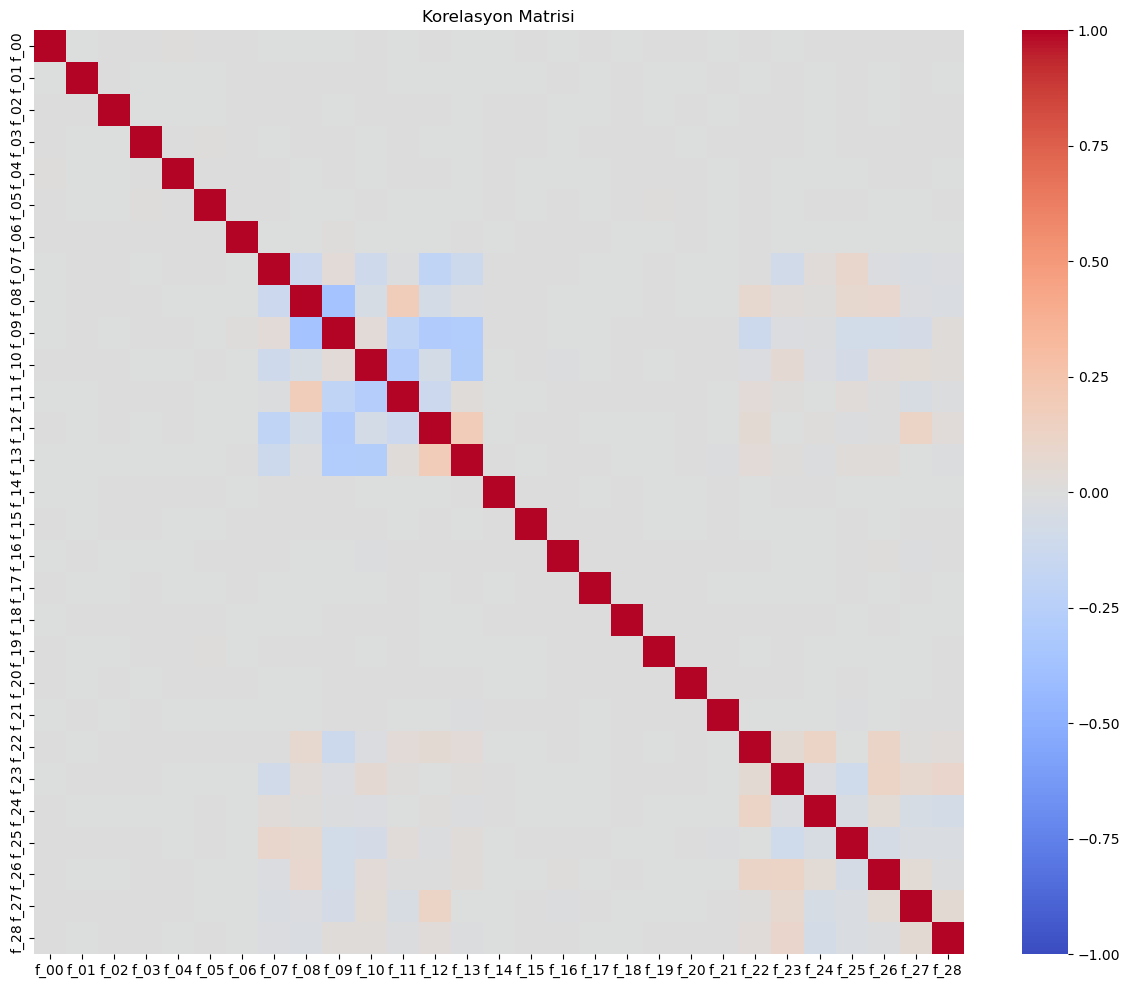

In [6]:
if not df_data.empty:
    display(df_data.head())
    df_data.info()
    
    # Korelasyon Matrisi
    plt.figure(figsize=(15, 12))
    sns.heatmap(df_data.drop(columns=['id'], errors='ignore').corr(), cmap='coolwarm', vmin=-1, vmax=1)
    plt.title('Korelasyon Matrisi')
    plt.show()


# Preprocessing


In [7]:
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.pipeline import Pipeline

if not df_data.empty:
    X = df_data.drop(columns=['id'], errors='ignore')
    
    # Clustering için Scaling çok önemlidir
    # PowerTransformer veriyi daha Gauss dağılımına yaklaştırır (BGMM için iyidir)
    preprocessor = Pipeline([
        ('scaler', PowerTransformer()) 
    ])
    
    X_scaled = preprocessor.fit_transform(X)
    print('Veri ölçeklendi.')


Veri ölçeklendi.


# Modelleme (Bayesian Gaussian Mixture)


K-Means ile Inertia hesaplanıyor...


  File "C:\Users\Erhan\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\Erhan\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Erhan\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                        pass_fds, cwd, env,
                        ^^^^^^^^^^^^^^^^^^^
    ...<5 lines>...
                        gid, gids, uid, umask,
                        ^^^^^^^^^^^^^^^^^^^^^^
                        start_new_session, process_group)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Erhan\anaconda3\Lib\subprocess.

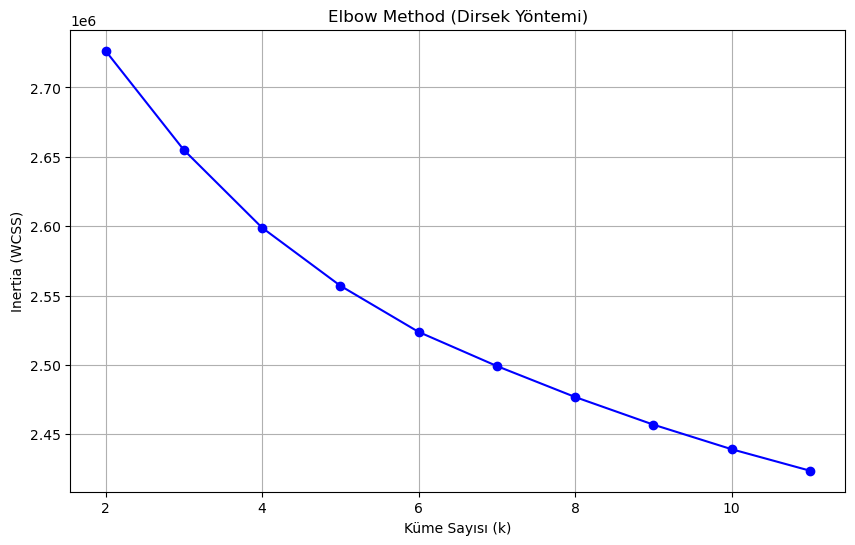

Grafikte kırılmanın (dirseğin) en keskin olduğu nokta optimum küme sayısıdır.


In [8]:
from sklearn.cluster import KMeans

if not df_data.empty:
    inertia = []
    k_range = range(2, 12)
    
    print("K-Means ile Inertia hesaplanıyor...")
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(X_scaled)
        inertia.append(kmeans.inertia_)
   
    plt.figure(figsize=(10, 6))
    plt.plot(k_range, inertia, 'bo-')
    plt.xlabel('Küme Sayısı (k)')
    plt.ylabel('Inertia (WCSS)')
    plt.title('Elbow Method (Dirsek Yöntemi)')
    plt.grid(True)
    plt.show()
    print("Grafikte kırılmanın (dirseğin) en keskin olduğu nokta optimum küme sayısıdır.")

Elbow Methodu için hesaplama yapılıyor, lütfen bekleyin...


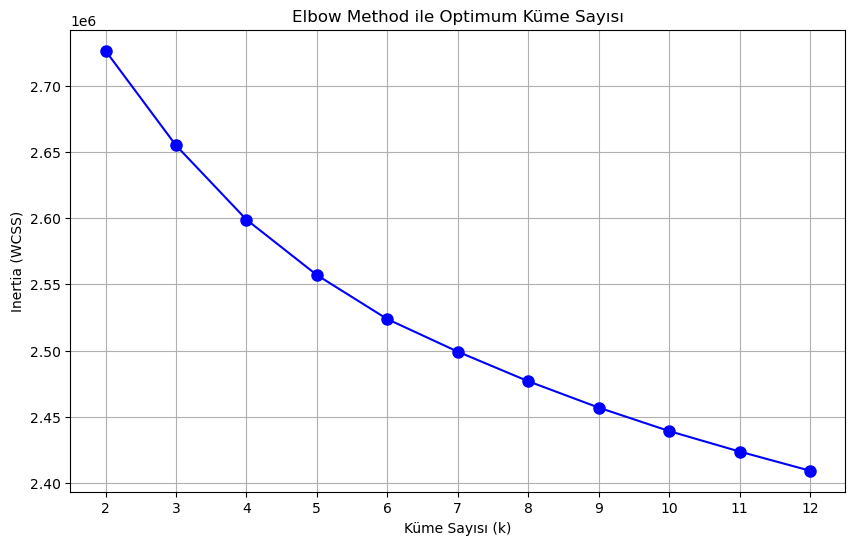

Grafikteki 'dirsek' noktası (eğimin azaldığı ilk kırılma), optimum küme sayısını gösterir.


In [9]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

if not df_data.empty:
    inertia = []
    # 2'den 12'ye kadar k değerlerini dene
    k_range = range(2, 13)
    
    print("Elbow Methodu için hesaplama yapılıyor, lütfen bekleyin...")
    
    for k in k_range:
        
    # n_init='auto' veya 10, uyarıları önlemek için
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(X_scaled)
        inertia.append(kmeans.inertia_)
   
    # Grafiği Çiz
    plt.figure(figsize=(10, 6))
    plt.plot(k_range, inertia, 'bo-', markersize=8)
    plt.xlabel('Küme Sayısı (k)')
    plt.ylabel('Inertia (WCSS)')
    plt.title('Elbow Method ile Optimum Küme Sayısı')
    plt.grid(True)
    plt.xticks(k_range)
    plt.show()
    
    print("Grafikteki 'dirsek' noktası (eğimin azaldığı ilk kırılma), optimum küme sayısını gösterir.")

In [10]:
from sklearn.mixture import BayesianGaussianMixture
from sklearn.pipeline import Pipeline

if not df_data.empty:
    # 7 Cluster (optimal CLUSTER sayısı olarak)
    n_clusters = 7
    
    # Pipeline içine modeli koyalım
    pipeline = Pipeline([
        ('preprocessor', preprocessor), # scaler tekrar
        ('clusterer', BayesianGaussianMixture(
            n_components=n_clusters, 
            covariance_type='full', 
            random_state=42,
            n_init=3
        ))
    ])
    
    print('Model Eğitiliyor...')
    # Pipeline fit edilirken X (ham veri) verilir, preprocessor içinde scale olur
    pipeline.fit(X)
    
    preds = pipeline.predict(X)
    print('Kümeleme tamamlandı.')


Model Eğitiliyor...
Kümeleme tamamlandı.


# Değerlendirme


Silhouette Score (Sampled): 0.0146


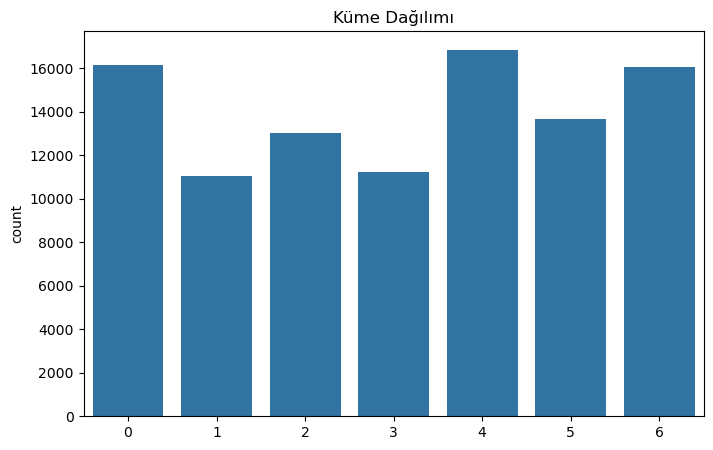

In [11]:
from sklearn.metrics import silhouette_score

if not df_data.empty:
    # Silhouette Score (Çok büyük veride yavaş olabilir, örneklem alarak hesaplayalım)
    sample_indices = np.random.choice(X_scaled.shape[0], 10000, replace=False)
    score = silhouette_score(X_scaled[sample_indices], preds[sample_indices])
    print(f'Silhouette Score (Sampled): {score:.4f}')
    
    # Cluster Dağılımı
    plt.figure(figsize=(8,5))
    sns.countplot(x=preds)
    plt.title('Küme Dağılımı')
    plt.show()


In [12]:
import plotly.express as px

if not df_data.empty:
    # 3 Bileşenli PCA
    pca_3d = PCA(n_components=3, random_state=42)
    X_pca_3d = pca_3d.fit_transform(X_scaled)
    
    df_pca_3d = pd.DataFrame(X_pca_3d, columns=['PC1', 'PC2', 'PC3'])
    df_pca_3d['Cluster'] = preds
    
    # Sadece ilk 5000 örneği çizelim (Performans için)
    fig = px.scatter_3d(
        df_pca_3d.head(5000),
        x='PC1', y='PC2', z='PC3',
        color='Cluster',
        title='Kümelerin 3 Boyutlu PCA Dağılımı (İlk 5000 Örnek)',
        opacity=0.7
    )
    fig.show()

NameError: name 'PCA' is not defined

# Modeli Kaydetme


In [15]:
import joblib
if not df_data.empty:
    os.makedirs('../models', exist_ok=True)
    joblib.dump(pipeline, '../models/best_model.pkl')
    print('Model Saved.')


Model Saved.


# Submission


In [16]:
if not df_data.empty:
    submission = pd.DataFrame({
        'Id': df_data['id'] if 'id' in df_data.columns else df_data.index,
        'Predicted': preds
    })
    
    os.makedirs('../outputs', exist_ok=True)
    submission.to_csv('../outputs/submission.csv', index=False)
    print('Submission oluşturuldu.')
    display(submission.head())


Submission oluşturuldu.


,Id,Predicted
0,0,5
1,1,1
2,2,5
3,3,2
4,4,4
